In [1]:
!pip install matplotlib owslib

     |████████████████████████████████| 7.4 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 219 kB 8.1 MB/s eta 0:00:01
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
     |████████████████████████████████| 3.3 MB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 244 kB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 8.9 MB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 6.3 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 19.8 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 8.0 MB/s eta 0:00:01�██▊ | 4.6 MB 8.0 MB/s eta 0:00:01


In [2]:
from owslib.wms import WebMapService

wms = WebMapService('http://apps.ecmwf.int/wms/?token=public')

HTTPError: 404 Client Error: Not Found for url: https://apps.ecmwf.int:443/wms/?token=public&service=WMS&request=GetCapabilities&version=1.1.1

In [4]:
list(wms.contents)

['osm',
 'z500_field',
 'z500_public',
 't850_public',
 '850ws',
 'ws850_public',
 'composition_aod550',
 'composition_europe_nh3_forecast_surface',
 'background',
 'composition_bbaod550',
 'composition_europe_pol_birch_forecast_surface',
 'boundaries',
 'composition_co2_300hpa',
 'composition_co2_50hpa',
 'composition_co2_500hpa',
 'composition_co2_850hpa',
 'composition_co2_surface',
 'composition_co_300hpa',
 'composition_co_50hpa',
 'composition_co_500hpa',
 'composition_co700',
 'composition_co_850hpa',
 'composition_co_upperlevel',
 'composition_co_surface',
 'composition_europe_co_forecast_surface',
 'composition_uvindex_clearsky_daily_max',
 'composition_uvindex_clearsky',
 'composition_duaod550',
 'composition_europe_dust_forecast_surface',
 'z500_mean_public',
 't850_mean_public',
 'ws850_mean_public',
 'msl_mean_public',
 'z500_spread_public',
 't850_spread_public',
 'ws850_spread_public',
 'msl_spread',
 'msl_spread_public',
 'composition_fire',
 'foreground',
 'composition

In [5]:
print(list(wms.contents))

['osm', 'z500_field', 'z500_public', 't850_public', '850ws', 'ws850_public', 'composition_aod550', 'composition_europe_nh3_forecast_surface', 'background', 'composition_bbaod550', 'composition_europe_pol_birch_forecast_surface', 'boundaries', 'composition_co2_300hpa', 'composition_co2_50hpa', 'composition_co2_500hpa', 'composition_co2_850hpa', 'composition_co2_surface', 'composition_co_300hpa', 'composition_co_50hpa', 'composition_co_500hpa', 'composition_co700', 'composition_co_850hpa', 'composition_co_upperlevel', 'composition_co_surface', 'composition_europe_co_forecast_surface', 'composition_uvindex_clearsky_daily_max', 'composition_uvindex_clearsky', 'composition_duaod550', 'composition_europe_dust_forecast_surface', 'z500_mean_public', 't850_mean_public', 'ws850_mean_public', 'msl_mean_public', 'z500_spread_public', 't850_spread_public', 'ws850_spread_public', 'msl_spread', 'msl_spread_public', 'composition_fire', 'foreground', 'composition_hcho_300hpa', 'composition_hcho_50hpa',

In [6]:
wms['composition_co2_surface'].boundingBoxWGS84

(-180.0, -90.0, 180.0, 90.0)

In [7]:
# Styles

wms['composition_co2_surface'].styles

{'sh_nipy_spectral_co2_surface': {'title': 'Contour shade (Range: 180.0 / 440.0, nipy_spectral colours)',
  'legend': 'https://apps.ecmwf.int/wms/?token=public&request=GetLegend&layers=composition_co2_surface&styles=sh_nipy_spectral_co2_surface&width=350&height=50'},
 'sh_Spectral_r_co2_surface': {'title': 'Contour shade (Range: 300 / 490, Spectral_r colours)',
  'legend': 'https://apps.ecmwf.int/wms/?token=public&request=GetLegend&layers=composition_co2_surface&styles=sh_Spectral_r_co2_surface&width=350&height=50'},
 'sh_RdGy_r_co2_surface': {'title': 'Contour shade (Range: 180.0 / 440.0, RdGy_r colours)',
  'legend': 'https://apps.ecmwf.int/wms/?token=public&request=GetLegend&layers=composition_co2_surface&styles=sh_RdGy_r_co2_surface&width=350&height=50'}}

In [8]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

In [9]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'image/svg+xml',
 'application/pdf',
 'application/postscript',
 'application/vnd.google-earth.kml+xml']

In [10]:
%matplotlib inline
import os, sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def getMap(layerName, bbox, filename):
    wms.getOperationByName('GetMap').formatOptions
    img = wms.getmap(layers=[layerName],
                size=(600,300),
                srs='EPSG:4326',
                bbox=bbox,
                format='image/png',
                transparent=True)

    tmpfile = open(filename, 'wb')
    tmpfile.write(img.read())
    tmpfile.close()


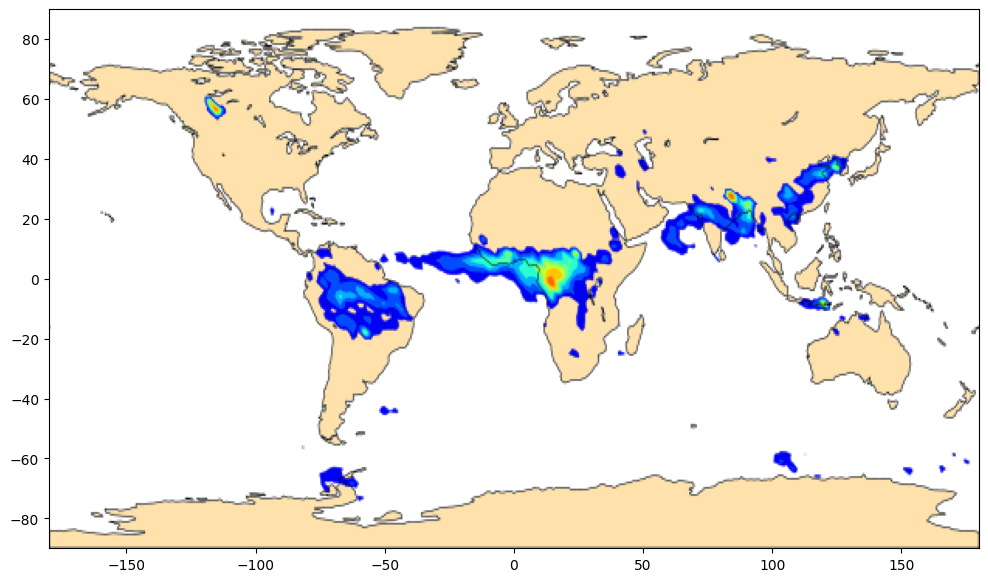

In [11]:
getMap('foreground', (-180,-90,180,90), 'foreground.png')
getMap('background', (-180,-90,180,90), 'background.png')
getMap('composition_bbaod550', (-180,-90,180,90), 'bbaod550.png')

image1=mpimg.imread('background.png')
image2=mpimg.imread('bbaod550.png')
image3=mpimg.imread('foreground.png')

fig = plt.figure(figsize=(12,7))

img1 = plt.imshow(image1, extent=[-180,180,-90,90],aspect='auto')
img2 = plt.imshow(image2, extent=[-180,180,-90,90],aspect='auto')
img3 = plt.imshow(image3, extent=[-180,180,-90,90],aspect='auto')

plt.show()